In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from Utils import *
from Models import *

Using TensorFlow backend.


In [2]:

def read_outputs(file_dir):
    score = []
    with open (file_dir, "r") as myfile:
        for line in myfile:
#           old output
            s = line.split(":")
            score.append(float(s[1]))
            break
        may_ndcgs = scores[0::5]
        june_ndcgs = scores[2::5]
        july_aucs = scores[4::5]
    return may_ndcgs, june_ndcgs, july_aucs
may_ndcgs, june_ndcgs, july_aucs = read_outputs("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_01_02:39:10")

NameError: name 'scores' is not defined

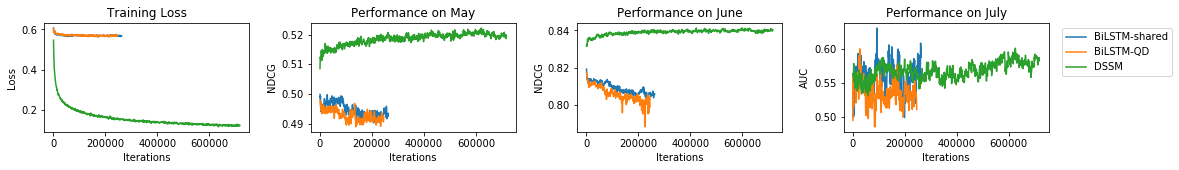

In [90]:

def read_outputs2(file_dir):
    may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss, acc = [], [], [], [], [], [], [], [], [], [], []
    model_name = ""
    with open (file_dir, "r") as myfile:
        
        for line in myfile:
            s = line.split(",")
            if model_name == "":
                model_name = s[0]
            if len(s) == 3:
                break
            may.append(float(s[4].split("=")[-1]))
            june.append(float(s[5].split("=")[-1]))
            july.append(float(s[6].split("=")[-1]))
            loss.append(float(s[7].split("=")[-1]))
            
            if "qd" in model_name:
                q_rec_loss.append(float(s[8].split("=")[-1]))
                d_rec_loss.append(float(s[9].split("=")[-1]))
                qd_loss.append(float(s[10].split("=")[-1]))
            if "kate2_bpeg" in model_name or "aae" in model_name:
                q_rec_loss.append(float(s[8].split("=")[-1]))
                d_rec_loss.append(float(s[9].split("=")[-1]))
#                 qd_loss.append(float(s[10].split("=")[-1]))
#                 qd_rec_loss.append(float(s[11].split("=")[-1]))

                
                
            
            
    
            
    return model_name, may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss, acc



def visualise(results, focus=[4,1,2,3], titles=["Training Loss", "Performance on May", "Performance on June", "Performance on July"], ylabels=["Loss", "NDCG", "NDCG", "AUC"], legends=None, save=None):
    width = 18
    height = 2
    plt.figure(figsize=(width, height))
    
    for i in range(4):
        plt.subplot(1, 4, i+1)
        for r in results:
            plt.plot([(i+1) * 1000 for i in range(len(r[focus[i]]))], r[focus[i]])
        plt.title(titles[i])
        plt.ylabel(ylabels[i])
        plt.xlabel('Iterations')

    if legends == None:
        plt.legend([i[0] for i in results],bbox_to_anchor=(1.04,1), loc="upper left")
    else:
        plt.legend([i for i in legends],bbox_to_anchor=(1.04,1), loc="upper left")

    
    plt.subplots_adjust(wspace=0.3)
    if save != None:
        plt.savefig('/work/png/%s' %save, bbox_inches='tight',pad_inches=1, dpi=300)
    plt.show()

run1 = read_outputs2("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:20:53")
run2 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:50:18")
run3 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:06")
visualise([run1, run2, run3], legends=["BiLSTM-shared", "BiLSTM-QD", "DSSM"])


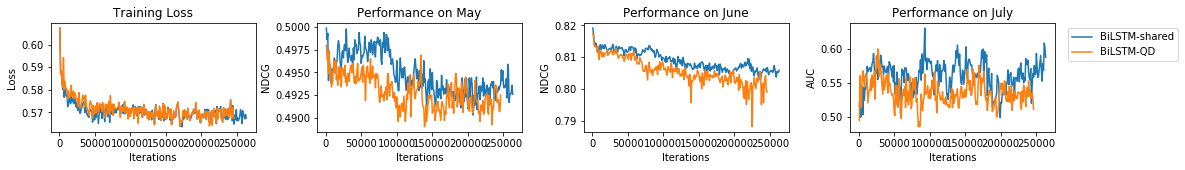

In [5]:
visualise([run1, run2], legends=["BiLSTM-shared", "BiLSTM-QD", "DSSM"])


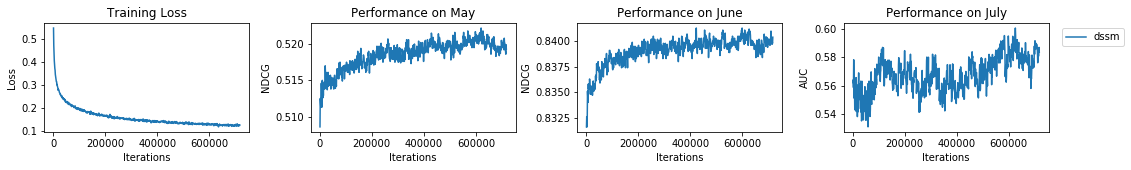

In [97]:
visualise([run3])


In [48]:
np.mean(run1[3]), np.mean(run2[3]), np.mean(run3[3])

(0.5611064638783269, 0.5357621951219511, 0.5679280334728034)

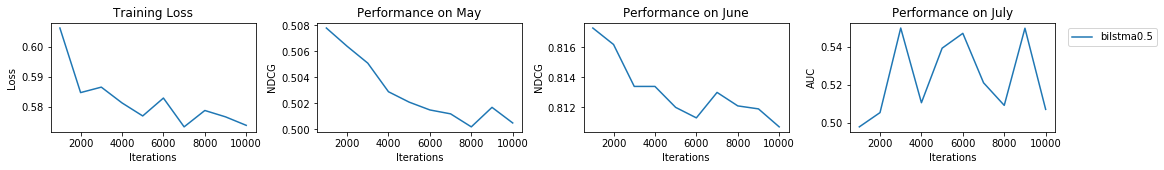

In [10]:
visualise([run23,run24])

In [7]:
run16 = read_outputs2("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_23:01:45")
np.mean(run16[3])

0.5238400000000001

In [41]:
np.max(run1[3])

0.6299

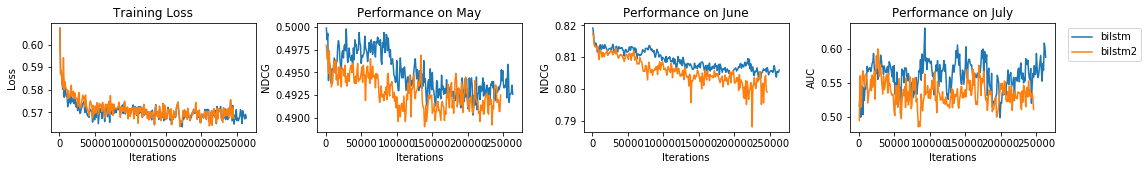

In [15]:
visualise([run1, run2])

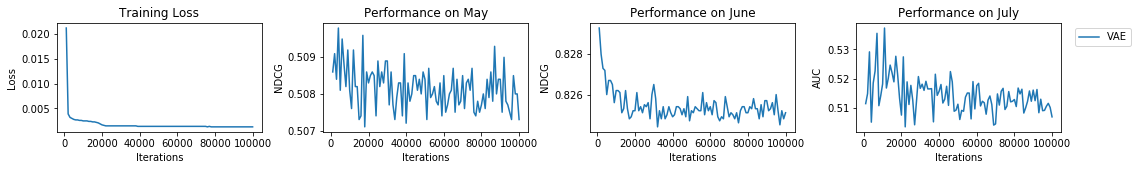

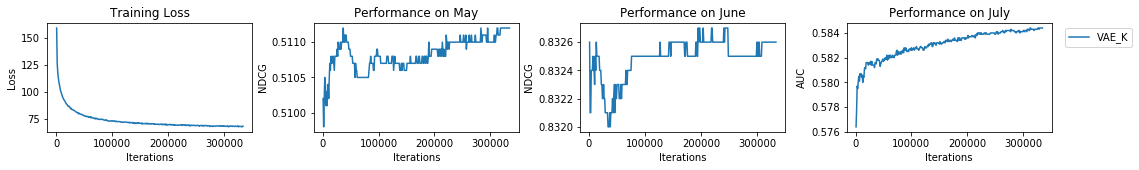

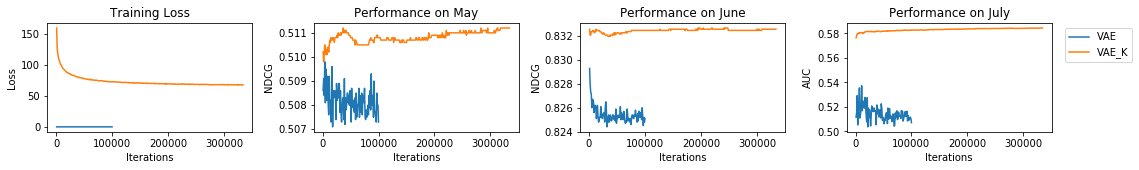

In [12]:
# without weights
run4 = read_outputs2("/work/data/out/kate1_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:27:00")
run5 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:26:38")
run6 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:28:06")
run7 = read_outputs2("/work/data/out/kate2_qdc_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:46")
run8 = read_outputs2("/work/data/out/kate2_qdg1_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:31:51")
# run3 = read_outputs2("/work/data/out/")
# visualise([run1, run2, run3])
visualise([run4], legends=["VAE"], save="vae")
visualise([run5], legends=["VAE_K"], save="vae_k")
visualise([run4, run5], legends=["VAE", "VAE_K"], save="vae,vae_k")

In [14]:
np.max(run5[3])

0.5844

In [160]:
def get_mean_results(runs, index):
    results = [np.mean(i[index]) for i in runs]
    for i in results:
        print(i)

print("NDCG")
get_mean_results([run1, run4,run5], 1)
print("NDCG")
get_mean_results([run1, run4,run5], 2)
print("AUC")
get_mean_results([run1, run4,run5], 3)


NDCG
0.4947908745247148
0.508159
0.5107387234042554
NDCG
0.8089813688212928
0.82544
0.8324646808510637
AUC
0.5611064638783269
0.514478
0.5826340425531915


In [177]:
run9 = read_outputs2("/work/data/out/kate2_qd")
run10 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.1_50K_BPE_30M_QD.txt_2018_07_03_04:17:17")
run11 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.9_50K_BPE_30M_QD.txt_2018_07_03_04:16:18")
run12 = read_outputs2("/work/data/out/kate2_qdg1_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_05:30:50")
run13 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_04:21:08")
run14 = read_outputs2("/work/data/out/kate2_qdc_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_05:30:07")


In [163]:
print("NDCG")
get_mean_results([run9, run10, run11, run12, run14], 1)
print("NDCG")
get_mean_results([run9, run10, run11, run12, run14], 2)
print("AUC")
get_mean_results([run9, run10, run11, run12, run14], 3)

NDCG
0.49771411764705886
0.49938720930232566
0.4972666666666667
0.497372602739726
0.4992591836734694
NDCG
0.8113141176470587
0.8155186046511629
0.8108440476190478
0.8121164383561644
0.8155469387755101
AUC
0.5302847058823529
0.5392639534883722
0.5325035714285714
0.5442027397260274
0.5441020408163265


In [164]:
print("NDCG")
get_mean_results([run1, run2], 1)
print("NDCG")
get_mean_results([run1, run2], 2)
print("AUC")
get_mean_results([run1, run2], 3)

NDCG
0.4947908745247148
0.49288089430894305
NDCG
0.8089813688212928
0.8058158536585366
AUC
0.5611064638783269
0.5357621951219511


In [17]:
run15 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_04_23:09:00")


### BiLSTM2 concat vs cosine

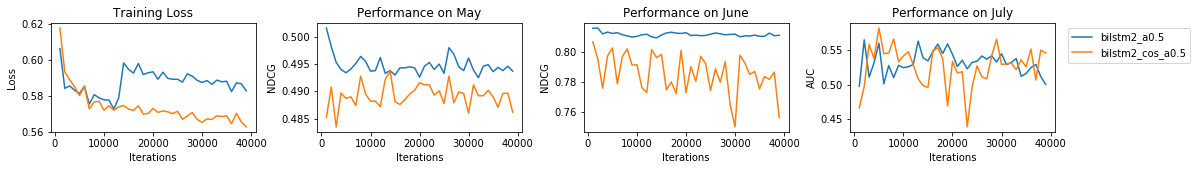

In [27]:
run20 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_01:22:32")
run21 = read_outputs2("/work/data/out/bilstm2_cos_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_01:24:06")

visualise([run20, run21])

### KATE2_QD vs KATE2_QD2 

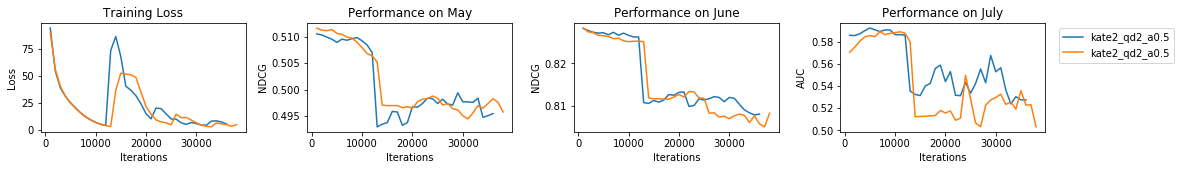

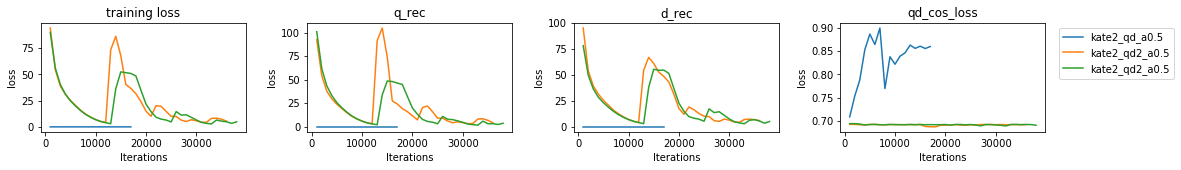

In [58]:
run22 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD.txt_2018_07_06_23:50:55")
run23 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_00:40:50")
run24 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD.txt_2018_07_07_00:06:01")

visualise([run23,run24])
visualise([run22, run23,run24], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

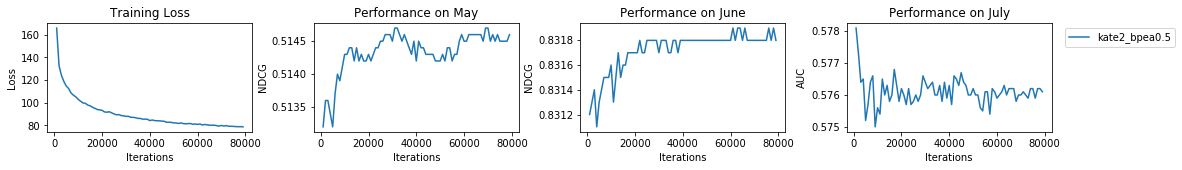

In [55]:
run25 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_22:45:37")
run26 = read_outputs2("/work/data/out/kate2_bpe_adam_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_22:45:46")

visualise([run25])

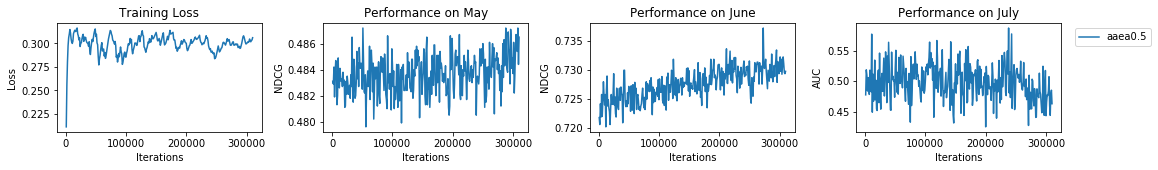

In [48]:
run27 = read_outputs2("/work/data/out/aae_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_04_22:59:56")

visualise([run27])

In [133]:
len(run27)

11

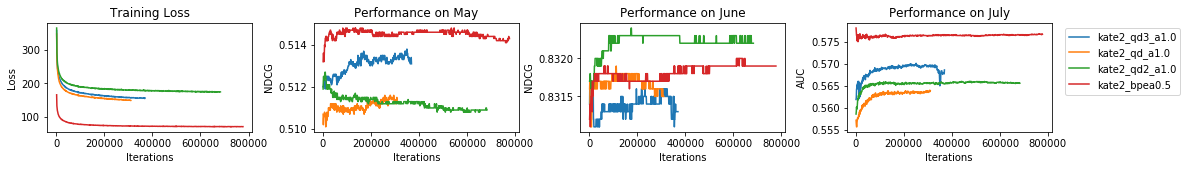

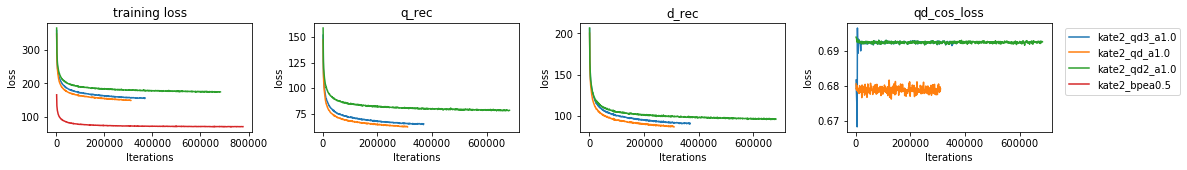

In [103]:
run27 = read_outputs2("/work/data/out/kate2_qd3_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f9e6492c6d8>_50K_BPE_30M_QD_lower2.txt_2018_07_07_05:58:15")
run28 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f20bf40cc50>_50K_BPE_30M_QD_lower2.txt_2018_07_07_06:00:48")
run29 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f68613d86d8>_50K_BPE_30M_QD_lower2.txt_2018_07_07_07:43:57")
run30 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_22:45:37")
visualise([run27,run28,run29, run30])
visualise([run27, run28, run29, run30], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

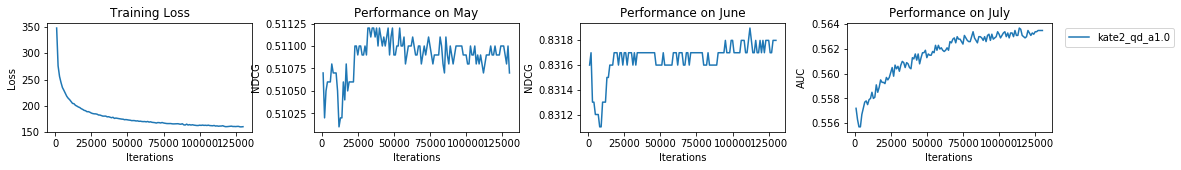

In [85]:
visualise([run28])

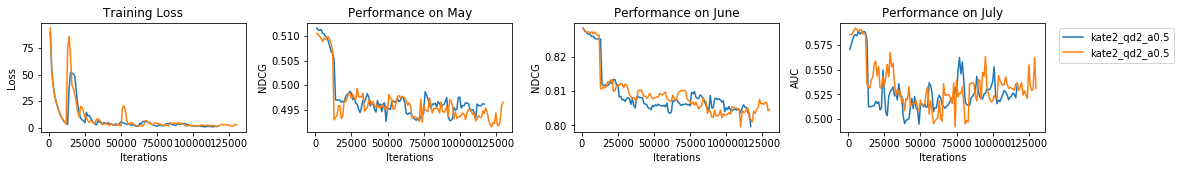

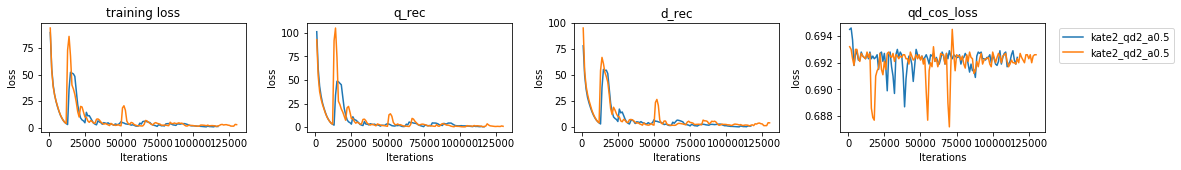

In [69]:
run27 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD.txt_2018_07_07_00:06:01")
run28 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_00:40:50")
visualise([run27,run28])
visualise([run27, run28], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

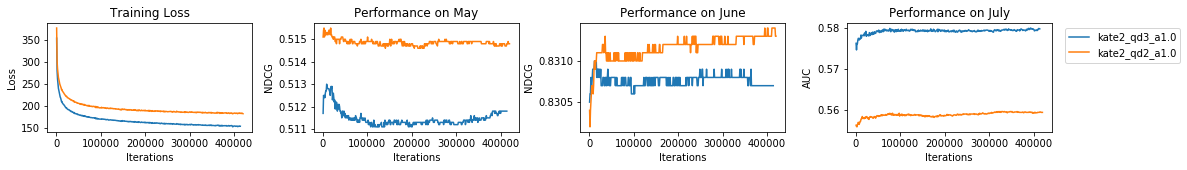

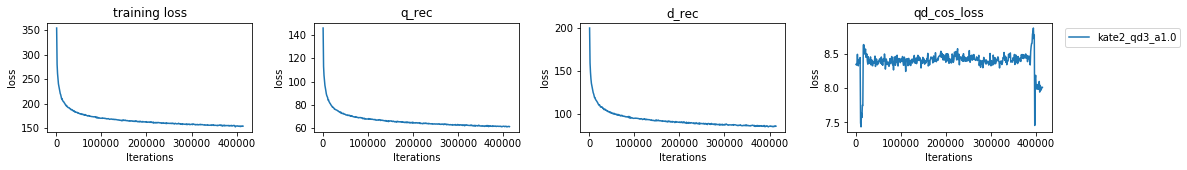

In [68]:
run31 = read_outputs2("/work/data/out/kate2_qd3_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7fd6fc3146a0>_50K_BPE_30M_QD_lower2.txt_2018_07_08_10:25:44")
run32 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f36eadf36a0>_50K_BPE_30M_QD_lower2.txt_2018_07_08_10:33:47")

visualise([run31,run32])
visualise([run31], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

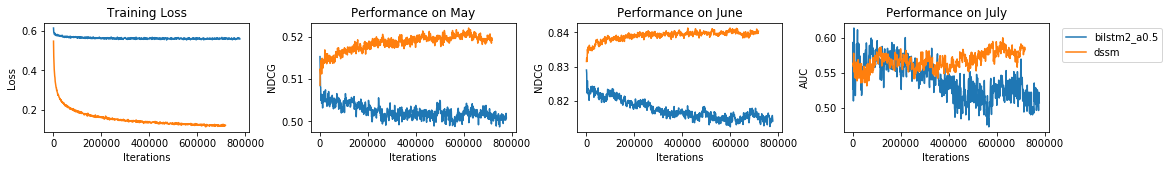

In [67]:
run33 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_04:10:14")

visualise([run33,run3])


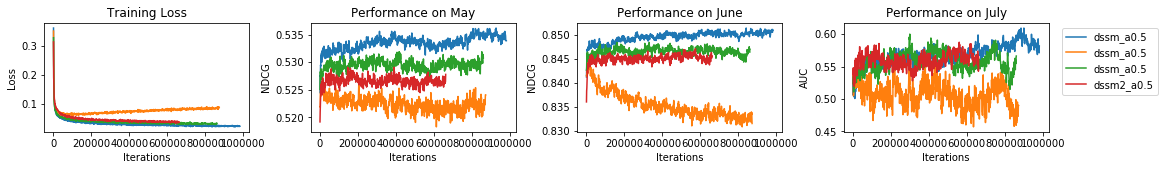

In [102]:
# adadelta default
run34 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_EN_pos_qd_log_2018_07_09_21:50:46")
# adam
run35 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_EN_pos_qd_log_2018_07_09_21:54:13")
# adadelta lt = 2
run36 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_<keras.optimizers.Adadelta object at 0x7f97c8de9c88>_50K_BPE_30M_EN_pos_qd_log_2018_07_09_22:12:27")
# separate user and query encoder
run39 = read_outputs2("/work/data/out/dssm2_h300_l128_n1_ml10_w50509_b32_a0.5_<keras.optimizers.Adadelta object at 0x7fe7363aa668>_50K_BPE_30M_EN_pos_qd_log_2018_07_10_19:57:41")
visualise([run34,run35, run36, run39])


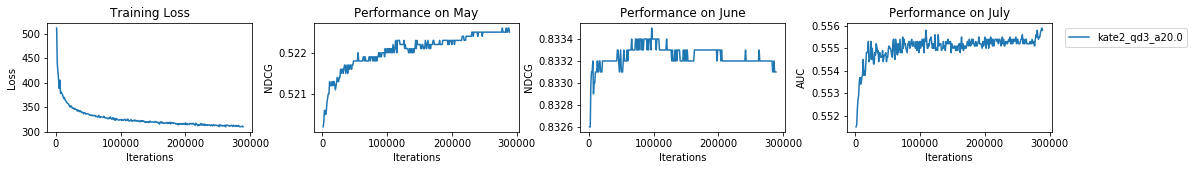

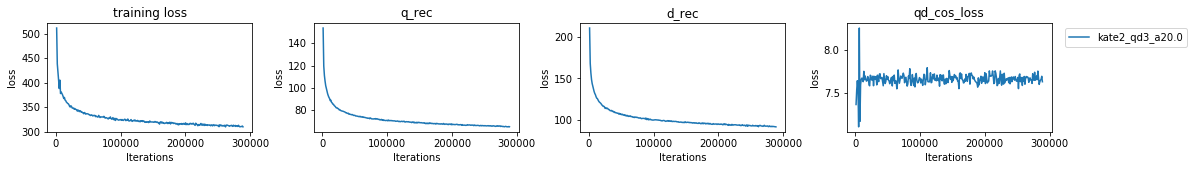

In [87]:
run37 = read_outputs2("/work/data/out/kate2_qd3_h300_l128_n1_ml10_w50509_b32_a20.0_<keras.optimizers.Adadelta object at 0x7fd51ea01710>_50K_BPE_30M_QD_lower2.txt_2018_07_09_22:33:38")
visualise([run37])
visualise([run37], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

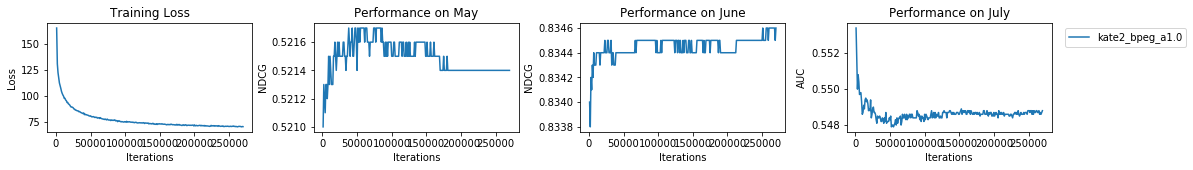

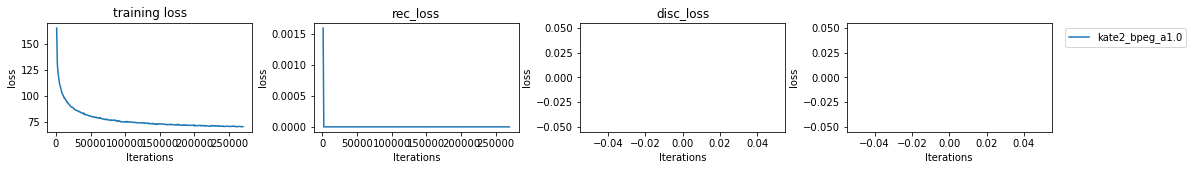

In [91]:
run38 = read_outputs2("/work/data/out/kate2_bpeg_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f0c3a404160>_50K_BPE_30M_QD_lower2.txt_2018_07_10_06:36:01")
visualise([run38])
visualise([run38], focus=[5,6,7,8], titles=["training loss", "rec_loss", "disc_loss", ""], ylabels=["loss", "loss", "loss", "loss"])

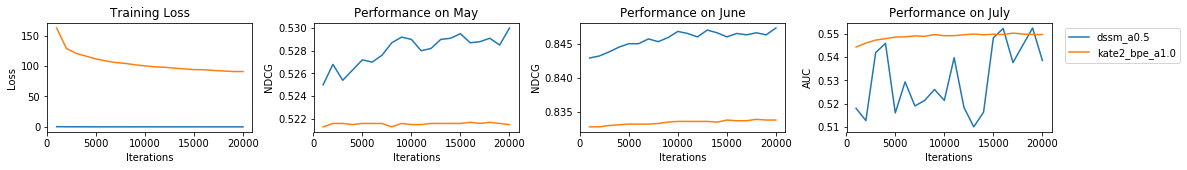

In [97]:
run40 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_<keras.optimizers.Adadelta object at 0x7f7d38c5e390>_50K_BPE_30M_EN_pos_qd_log_2018_07_11_19:26:36")
run41 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f572555cf28>_50K_BPE_30M_QD_lower2.txt_2018_07_11_19:22:51")
visualise([run40,run41])


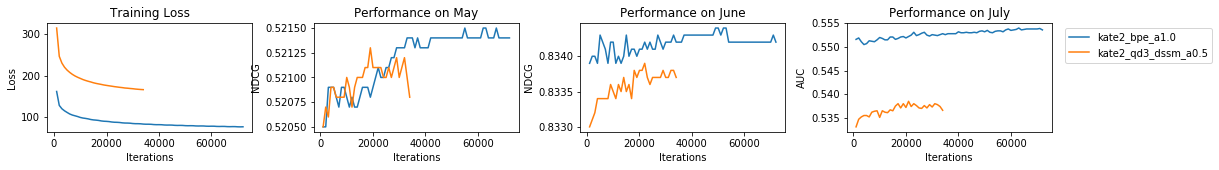

In [85]:
run40 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_e25_a1.0_<keras.optimizers.Adadelta object at 0x7f0d8e323be0>_50K_BPE_30M_QD_lower2.txt_2018_07_12_14:09:56")
run41 = read_outputs2("/work/data/out/kate2_qd3_dssm_h300_l128_n1_ml10_w50509_b32_e25_a0.5_<keras.optimizers.Adadelta object at 0x7f1ba650fef0>_50K_BPE_30M_EN_pos_qd_log_2018_07_12_14:11:21")

visualise([run40, run41])

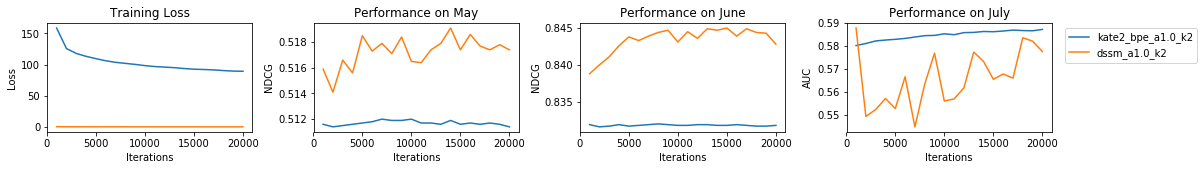

In [111]:
run42 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_k2_n1_ml10_w50509_b32_e5_a1.0_<keras.optimizers.Adadelta object at 0x7f68ee833ba8>_50K_BPE_30M_QD_lower2.txt_2018_07_13_19:05:00")
run43 = read_outputs2("/work/data/out/dssm_h300_l128_k2_n1_ml10_w50509_b32_e5_a1.0_<keras.optimizers.Adadelta object at 0x7fd940e20ba8>_50K_BPE_30M_QD_lower2.txt_2018_07_13_19:11:05")
visualise([run42, run43])